In [ ]:
!pip install vaderSentiment # Install the vaderSentiment library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Instagram_data_by_Bhanu.csv', encoding='latin1')

In [ ]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [ ]:
# checking for null values
df.isna().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


<Axes: >

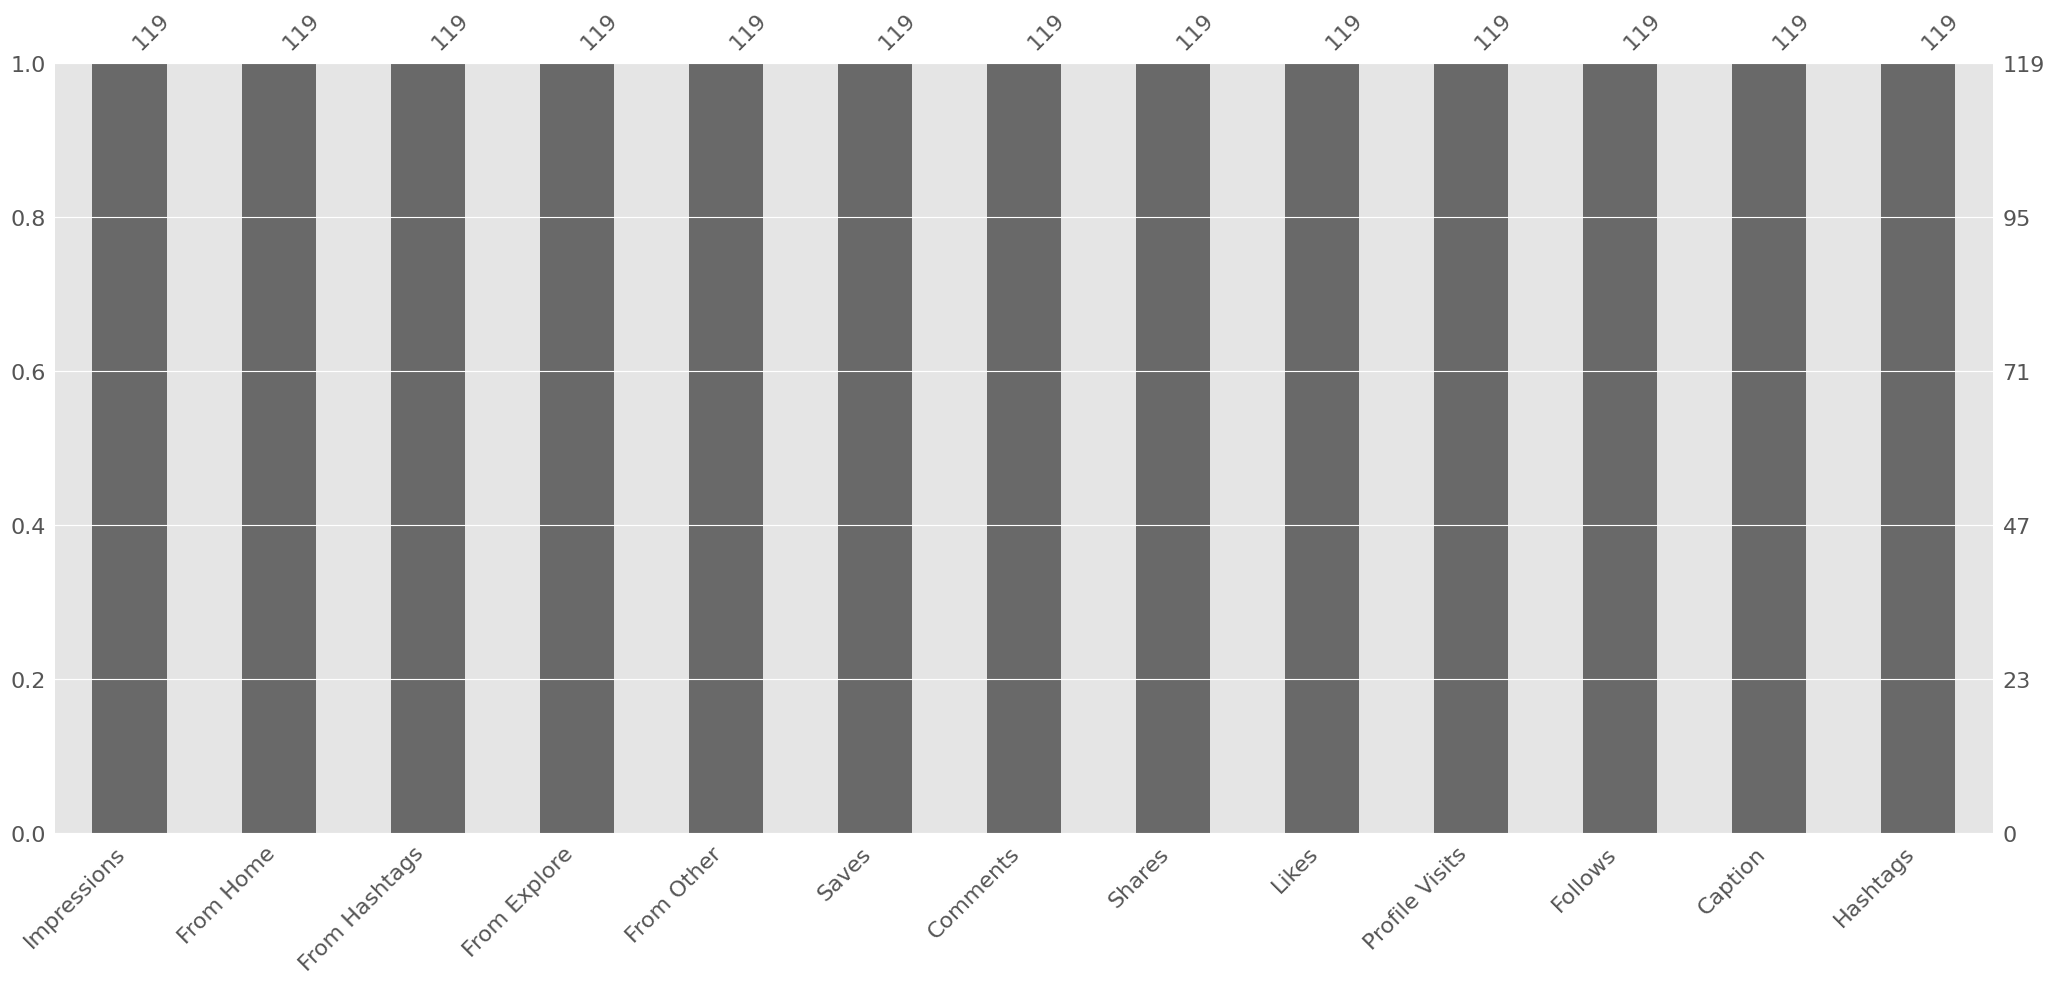

In [ ]:
# visualizing null values
msno.bar(df)

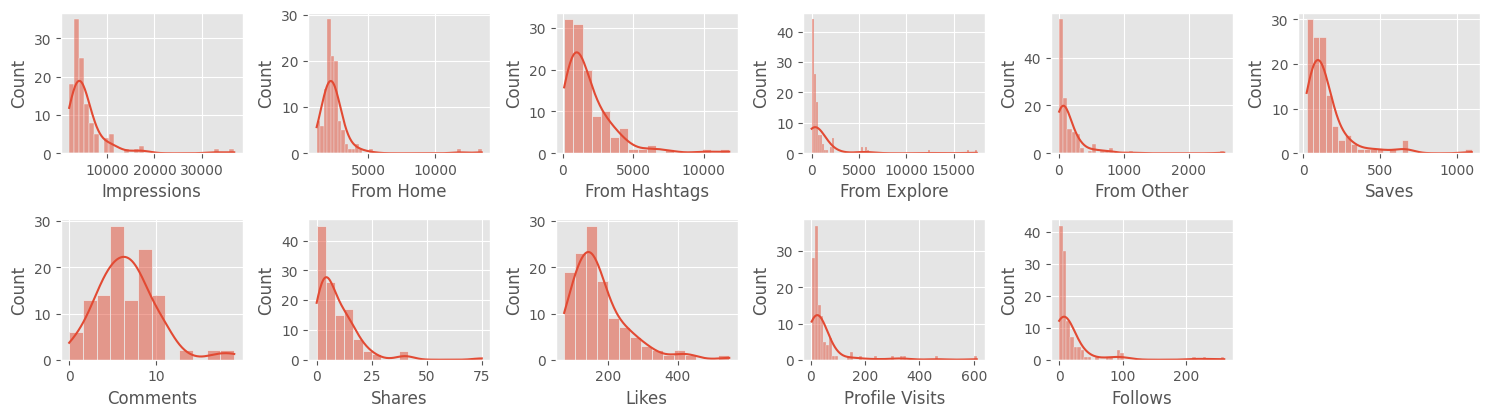

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns  # Select numeric columns only

plt.figure(figsize=(15, 10))
for plotnumber, column in enumerate(numeric_cols, 1):
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True)  # Use histplot instead of distplot (deprecated)
        plt.xlabel(column)

plt.tight_layout()
plt.show()


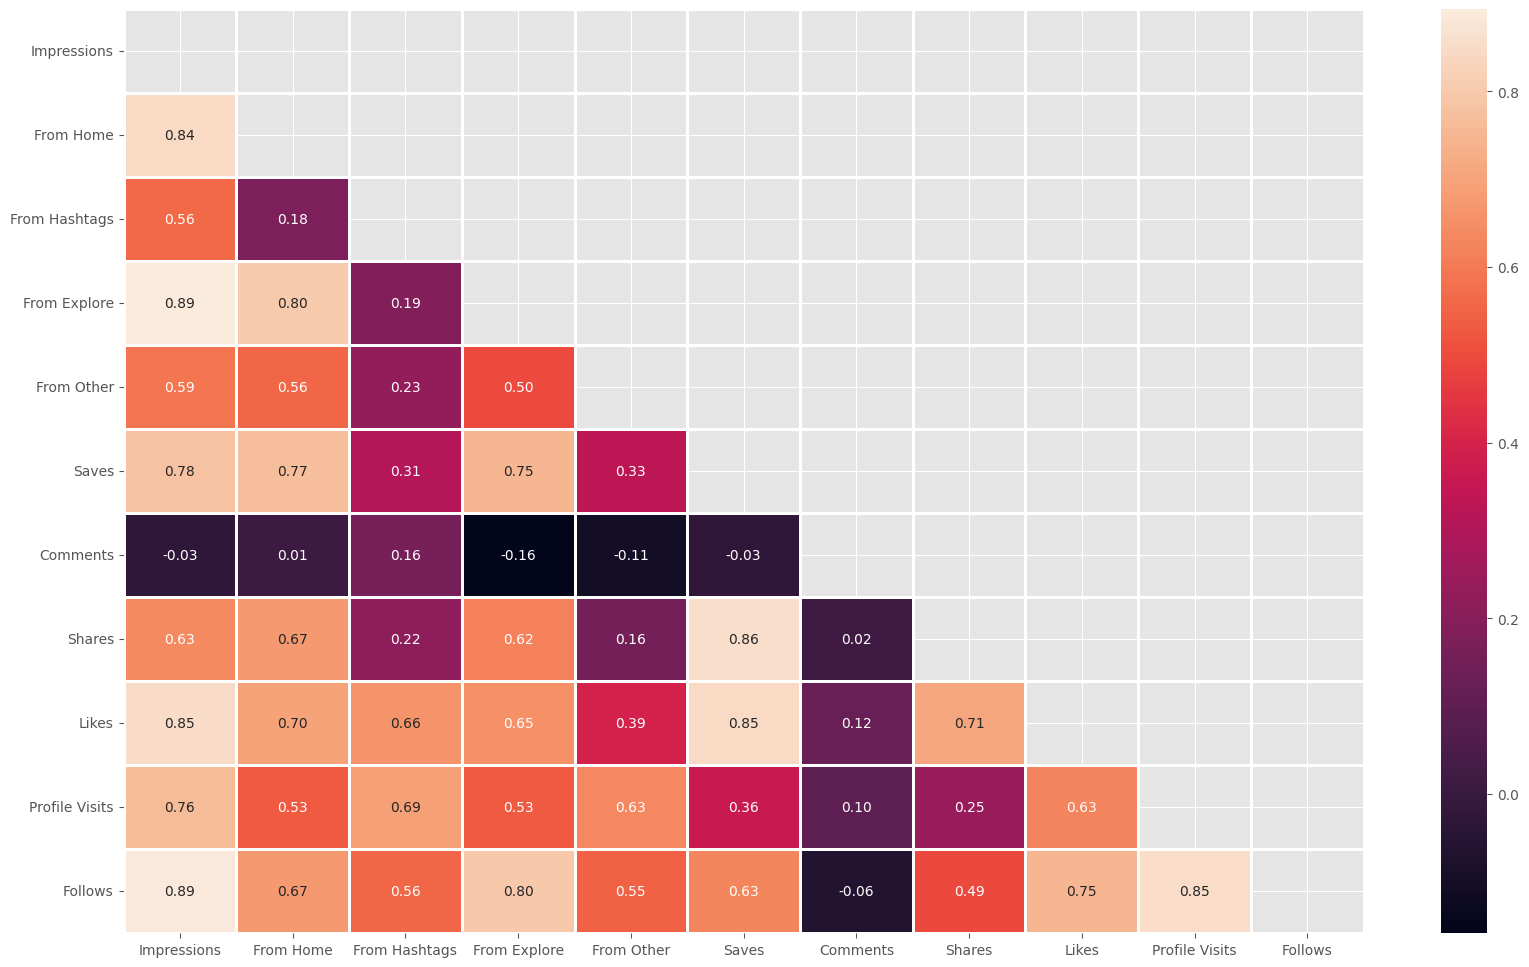

In [ ]:
# heatmap

plt.figure(figsize = (20, 12))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
print(df.columns)

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import silhouette_score, mean_squared_error
import numpy as np
import joblib # Import joblib for saving the model

# Load the dataset
df_instagram = pd.read_csv("/content/drive/MyDrive/Instagram_data_by_Bhanu.csv", encoding="latin1")

# Step 1: Sentiment Analysis (VADER)
analyzer = SentimentIntensityAnalyzer()
df_instagram["sentiment_score"] = df_instagram["Caption"].astype(str).apply(lambda x: analyzer.polarity_scores(x)["compound"])
df_instagram["sentiment_label"] = df_instagram["sentiment_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

# Step 2: Hashtag Clustering (TF-IDF + K-Means)
df_instagram["Hashtags"] = df_instagram["Hashtags"].fillna("NoHashtag")
df_instagram["Hashtags"] = df_instagram["Hashtags"].apply(lambda x: " ".join(x.split()))

df_filtered = df_instagram[df_instagram["Hashtags"] != "NoHashtag"]
if df_filtered["Hashtags"].nunique() > 1:
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df_filtered["Hashtags"])

    num_clusters = 5
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette Score for Hashtag Clustering: {silhouette_avg:.4f}")

    df_filtered["hashtag_cluster"] = clusters
else:
    print("❌ Not enough valid hashtags for clustering.")
    df_filtered["hashtag_cluster"] = -1

df_instagram = df_instagram.merge(df_filtered[["Hashtags", "hashtag_cluster"]], on="Hashtags", how="left")

# Step 3: Engagement Prediction (Random Forest Regression)
X = df_instagram[["Likes", "Shares", "Comments"]]
y = df_instagram["Impressions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Engagement Prediction Model MSE: {mse:.4f}")

# Save the trained model using joblib
joblib.dump(rf, "engagement_model.pkl")

# Step 4: Hyperparameter Tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
print("Best Parameters for Engagement Prediction:", grid_search.best_params_)

# Step 5: Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

print(f"Average Cross-Validation MSE: {np.mean(mse_scores):.4f}")

# Save final dataset with results
df_instagram.to_csv("phase3_results.csv", index=False)
print("✅ Phase 3 Completed! Results saved as 'phase3_results.csv'")


Silhouette Score for Hashtag Clustering: 0.2688
Engagement Prediction Model MSE: 289005.0421
Best Parameters for Engagement Prediction: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Average Cross-Validation MSE: 313471.8795
✅ Phase 3 Completed! Results saved as 'phase3_results.csv'


In [ ]:
from google.colab import files
files.download("phase3_results.csv")  # Replace with your actual file name

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("engagement_model.pkl")  # Replace with your actual model file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>